# Description

It gets the PCA transformation of an input file.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd
import seaborn as sns

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

## Input data

In [4]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [5]:
INPUT_FILEPATH = Path(
    conf.RESULTS["CLUSTERING_NULL_DIR"],
    "data_transformations",
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [6]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_NULL_DIR"], "data_transformations", "pca"
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/data_transformations/pca')

## PCA options

In [7]:
# parameters of the dimentionality reduction steps
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [8]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': 50, 'svd_solver': 'full', 'random_state': 0}

# Load input file

In [9]:
data = pd.read_pickle(INPUT_FILEPATH)

In [10]:
display(data.shape)

(3752, 987)

In [11]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.175043,-0.710171,-1.000846,0.693026,0.409413,0.642958,1.767862,-1.070425,0.809395,-1.555050,...,-0.932802,0.371349,-0.521787,-0.881136,-1.193309,-0.257883,1.382268,0.066549,-0.866086,0.847997
100002_raw-Energy,0.531227,0.894062,1.191552,-0.143922,0.217867,0.529878,0.219561,-1.538143,-0.166704,1.042749,...,-0.601329,0.625139,-0.113048,-1.477163,0.746773,0.316892,-0.660407,1.501067,0.543744,1.094294
100003_raw-Protein,0.405395,0.925288,-0.339507,0.799476,-0.512075,0.586632,0.361706,0.226860,1.208289,-1.880931,...,-0.489171,0.276717,-0.159505,-1.271106,0.300351,0.595915,0.509020,-0.127540,-0.811987,-1.108812
100004_raw-Fat,-0.156230,0.881426,0.395527,-1.570256,1.240955,2.064595,-0.547373,-1.228389,0.319684,0.858253,...,-0.407151,-1.217662,-0.361052,0.813221,-0.692981,1.099523,-0.017366,0.361278,-0.017222,1.750511
100005_raw-Carbohydrate,-0.142531,-0.521907,1.069304,0.548122,-0.422146,-1.330718,-1.260872,1.003617,1.266289,0.065408,...,1.506698,-0.069854,-0.084662,-1.269536,-0.421185,0.431180,1.673162,-0.954336,0.026593,0.655359


# PCA

In [12]:
from data.dimreduction import get_pca_proj

In [13]:
dr_data = get_pca_proj(data, DR_OPTIONS)

"PCA object: PCA(n_components=50, random_state=0, svd_solver='full')"

In [14]:
display(dr_data.shape)

(3752, 50)

In [15]:
display(dr_data.head())

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,-0.844744,3.134501,-1.885185,0.800877,-0.283830,0.027480,0.611143,1.485636,0.202757,0.450528,...,2.547792,-1.128343,-0.907277,-0.049764,-1.669310,-0.721449,2.077602,0.799708,1.271524,-1.871291
100002_raw-Energy,-0.078568,-1.675988,-0.826605,0.872125,-1.257784,0.276976,0.123534,-0.225430,1.291625,-0.406739,...,-1.595450,-0.979352,2.081672,-1.266333,-1.430714,2.733243,-0.293793,-1.427649,-1.315076,1.458368
100003_raw-Protein,-1.966843,-0.720839,-0.621370,1.066950,0.612613,-1.143542,-3.256801,0.637131,1.275239,-1.746677,...,-0.898644,1.423939,0.200717,0.080861,-0.910925,-0.266207,1.036173,0.326860,-0.197079,-0.322935
100004_raw-Fat,0.332482,-0.928841,-0.216911,0.486861,0.454021,-1.316312,0.226607,2.504342,-0.740799,-2.027466,...,0.101529,0.032200,-0.658490,-0.288036,1.399674,2.502066,1.872188,-0.239398,-1.349670,-0.457304
100005_raw-Carbohydrate,2.106644,1.025306,0.405959,2.645132,0.881081,-1.718546,0.693749,0.135447,-0.303163,-0.525056,...,0.612486,-0.769634,-0.264214,3.150728,-1.403396,2.893334,0.900700,0.200481,-2.369759,-0.348016


## Plot

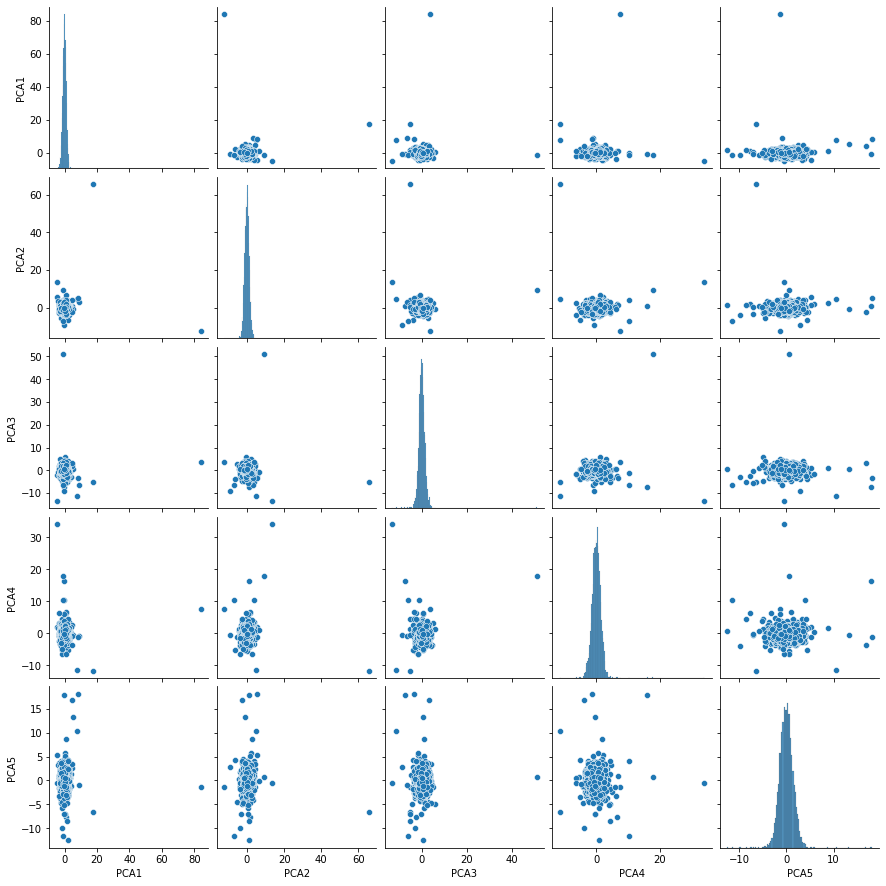

In [16]:
g = sns.pairplot(data=dr_data.iloc[:, :5])

# Save

In [17]:
output_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        ALL_OPTIONS, prefix=f"pca-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

display(output_file)

PosixPath('/opt/data/results/clustering/null_sims/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

In [18]:
dr_data.to_pickle(output_file)